In [1]:
%pip install grip
%pip install supyr-struct

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/138.5 kB ? eta -:

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ---------------------------------------- 0.0/236.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/236.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/236.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/236.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/236.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/236.5 kB ? eta -:--:--
   ----- --------------------------------- 30.7/236.5 kB 145.2 kB/s eta 0:00:02
   ---------- ---------------------------- 61.4/236.5 kB 233.8 kB/s eta 0:00:01
   --------------- ----------------------- 92.2/236.5 kB 308.0 kB/s eta 0:00:01
   ----------------------- -------------- 143.4/236.5 kB 425.3 kB/s eta 0:00:01
   --------------------------- ---------- 174.1/236.5 kB 455.1 kB/s eta 0:00:01
   -------------------------------------  235.5/236.5 kB 554.9 kB/s eta 0:00:01
   -------------------------------------- 236.5/236.5 kB 536.1 kB/s eta 0:00:00
Note: you m

### Descripción del Dataset

El dataset utilizado es un conjunto de imágenes en formato IDX comprimido en un archivo .gz, que contiene 60,000 imágenes en escala de grises de 28x28 píxeles. Este formato es comúnmente utilizado para datasets de imágenes en Machine Learning, como el MNIST. Las imágenes no están etiquetadas, por lo que se utilizarán técnicas de clustering para analizarlas.

¿Qué es el formato IDX y cuál es la diferencia respecto a .csv?

- Formato IDX: El formato IDX es un formato binario que se utiliza para almacenar grandes cantidades de datos de manera eficiente. Es comúnmente usado en datasets de imágenes como MNIST. Los datos se almacenan en una estructura compacta y se pueden leer rápidamente. Los archivos IDX suelen estar comprimidos en .gz para reducir el tamaño del archivo.

- Formato CSV: El formato CSV (Comma-Separated Values) es un formato de texto plano que almacena datos tabulares en forma de texto. Cada línea del archivo representa una fila de la tabla y las columnas están separadas por comas. Los archivos CSV son fáciles de leer y editar con herramientas simples, pero no son tan eficientes en términos de almacenamiento y velocidad de lectura/escritura como los archivos binarios como IDX.

#### Paso 1: Importar Librerías Necesarias y Definir Función para Leer el Archivo IDX

 En este paso se lee un archivo IDX comprimido y lo carga en un array de NumPy. La función read_idx descomprime el archivo, lee el encabezado para obtener las dimensiones del array y luego carga los datos en una estructura de array de NumPy.

In [15]:
import gzip
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ruta del archivo
file_path = 'train-images-idx3-ubyte.gz'

## Función para leer el archivo IDX
def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        # Leer el encabezado del archivo
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        # Leer los datos del archivo
        data = np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
        return data
    
## Cargar los datos
images = read_idx(file_path)

images

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [ 83, 147, 126, ..., 145,  49,   0

Imprimimos la forma del array de imágenes, confirmando que hay 60,000 imágenes, cada una de 28x28 píxeles.

In [31]:
# Mostrar la forma de las imágenes

print(f"Shape de las imágenes: {images.shape}")

Shape de las imágenes: (60000, 28, 28)


#### Paso 3: Aplanar las Imágenes y Crear un DataFrame
 Las imágenes 2D se aplanan a una dimensión (28x28 = 784 columnas) para que cada imagen sea una fila en el DataFrame. Cada columna representa un píxel, y sus valores van de 0 a 255, representando la intensidad en escala de grises.

In [17]:
# Aplanar las imágenes para que cada imagen sea una fila
n_samples, width, height = images.shape
images_flat = images.reshape(n_samples, width * height)

# Crear un DataFrame de pandas
columns = [f'pixel{i}' for i in range(width * height)]
df_images = pd.DataFrame(images_flat, columns=columns)

# Visualizar las primeras filas del DataFrame
print(df_images.head())


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0      32   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       122       255        90         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3     164  ...       255        64         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

#### Paso 4: Mostrar la Forma del DataFrame

Confirmamos que el DataFrame tiene 60,000 filas (imágenes) y 784 columnas (píxeles).

In [19]:
images_flat
print(f"Shape de las imágenes: {df_images.shape}")

Shape de las imágenes: (60000, 784)


### Paso 5: Normalizar los Datos
Los datos se normalizan para que los valores de los píxeles estén en el rango [0, 1] en lugar de [0, 255]. 

In [23]:
images_normalized = images_flat.astype(np.float32) / 255
images_normalized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Paso 6: Convertir los Datos a Imágenes y Mostrar Algunas Imágenes Aleatorias


Se vuelve a convertir las imágenes a su forma original (28x28) para poder visualizarlas con matplotlib. Se seleccionan 9 imágenes aleatorias para su visualización.

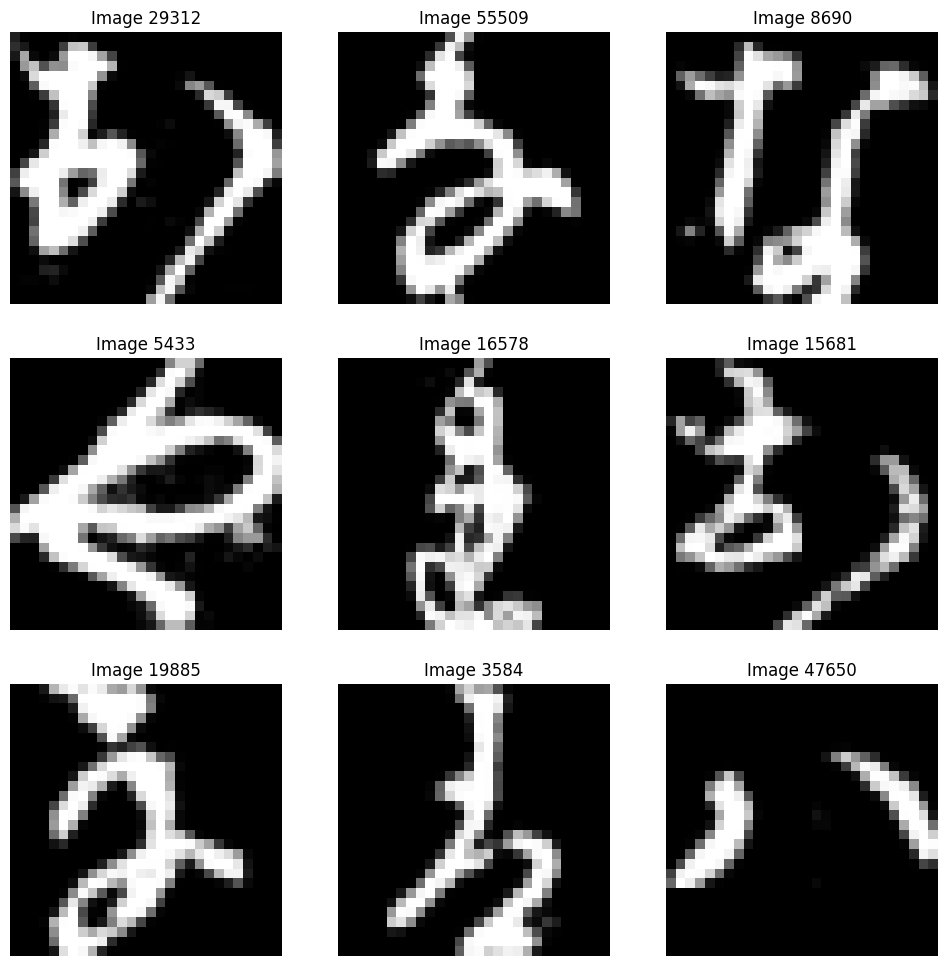

In [26]:
# Convertir los datos planos en imágenes 64x64
images_reshaped = images_normalized.reshape(-1, 28, 28)

# Índices aleatorios
random_indices = np.random.choice(len(images_reshaped), size=9, replace=False)

# Mostrar algunas imágenes aleatorias
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.imshow(images_reshaped[random_indices[i]], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Image {random_indices[i]}')

plt.show()

 #### Paso 7: Volver a Aplanar las Imágenes para Clustering

Volvemos a aplanar las imágenes para prepararlas para el clustering.

In [28]:
n_samples, width, height = images.shape
images_flat = images_reshaped.reshape(n_samples, width * height)

#### Paso 8: Calcular el Score de Silueta para Diferentes Números de Clusters

Utilizamos K-Means para realizar clustering en diferentes números de clusters (2 a 15) y calculamos el score de silueta para cada uno. El score de silueta mide la calidad del clustering. Un score más alto indica que las muestras están bien agrupadas dentro de sus clusters. Se grafica el score de silueta y se determina el número óptimo de clusters.

**Diagrama de Silueta**

**Explicación del Diagrama de Silueta:**

El diagrama de silueta es una herramienta de visualización que mide la calidad de un clustering. Cada punto en el diagrama representa una muestra y muestra qué tan cerca está del cluster vecino, comparado con su propio cluster.

- Silhouette Coefficient: El coeficiente de silueta varía entre -1 y 1. Un valor cercano a 1 indica que la muestra está bien agrupada dentro de su cluster y es distinta a los otros clusters. Un valor cercano a 0 indica que la muestra está en el límite entre dos clusters. Un valor negativo indica que la muestra podría estar mal asignada a su cluster.

- Interpretación: Un promedio de silueta más alto sugiere un mejor clustering. Sin embargo, también se debe considerar la estabilidad y consistencia de los clusters al seleccionar el número óptimo de clusters.

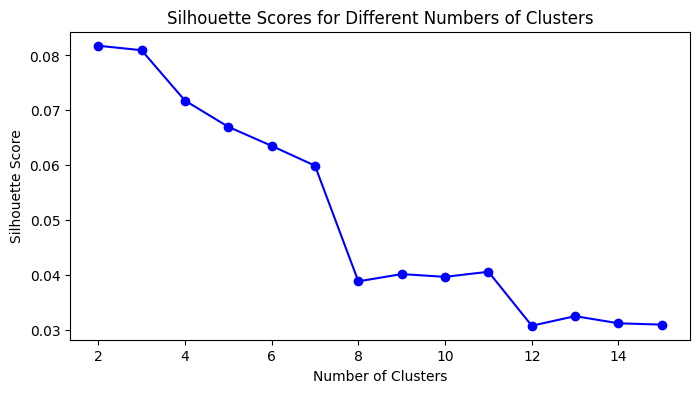

El número óptimo de clusters es: 2


In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Preparar el rango de números de clusters a evaluar
range_values = range(2, 16)
silhouette_scores = []

# Calcular el score de silueta para cada número de clusters
for k in range_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(images_normalized)
    score = silhouette_score(images_normalized, kmeans.labels_)
    silhouette_scores.append(score)

# Gráfico de los scores de silueta
plt.figure(figsize=(8, 4))
plt.plot(range_values, silhouette_scores, "bo-")
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Imprimir el número óptimo de clusters
optimal_clusters = range_values[silhouette_scores.index(max(silhouette_scores))]
print(f'El número óptimo de clusters es: {optimal_clusters}')


#### Paso 9: Visualización de los Diagramas de Silueta
Después de encontrar el número óptimo de clusters, podemos visualizar los diagramas de silueta para confirmar la calidad del clustering.

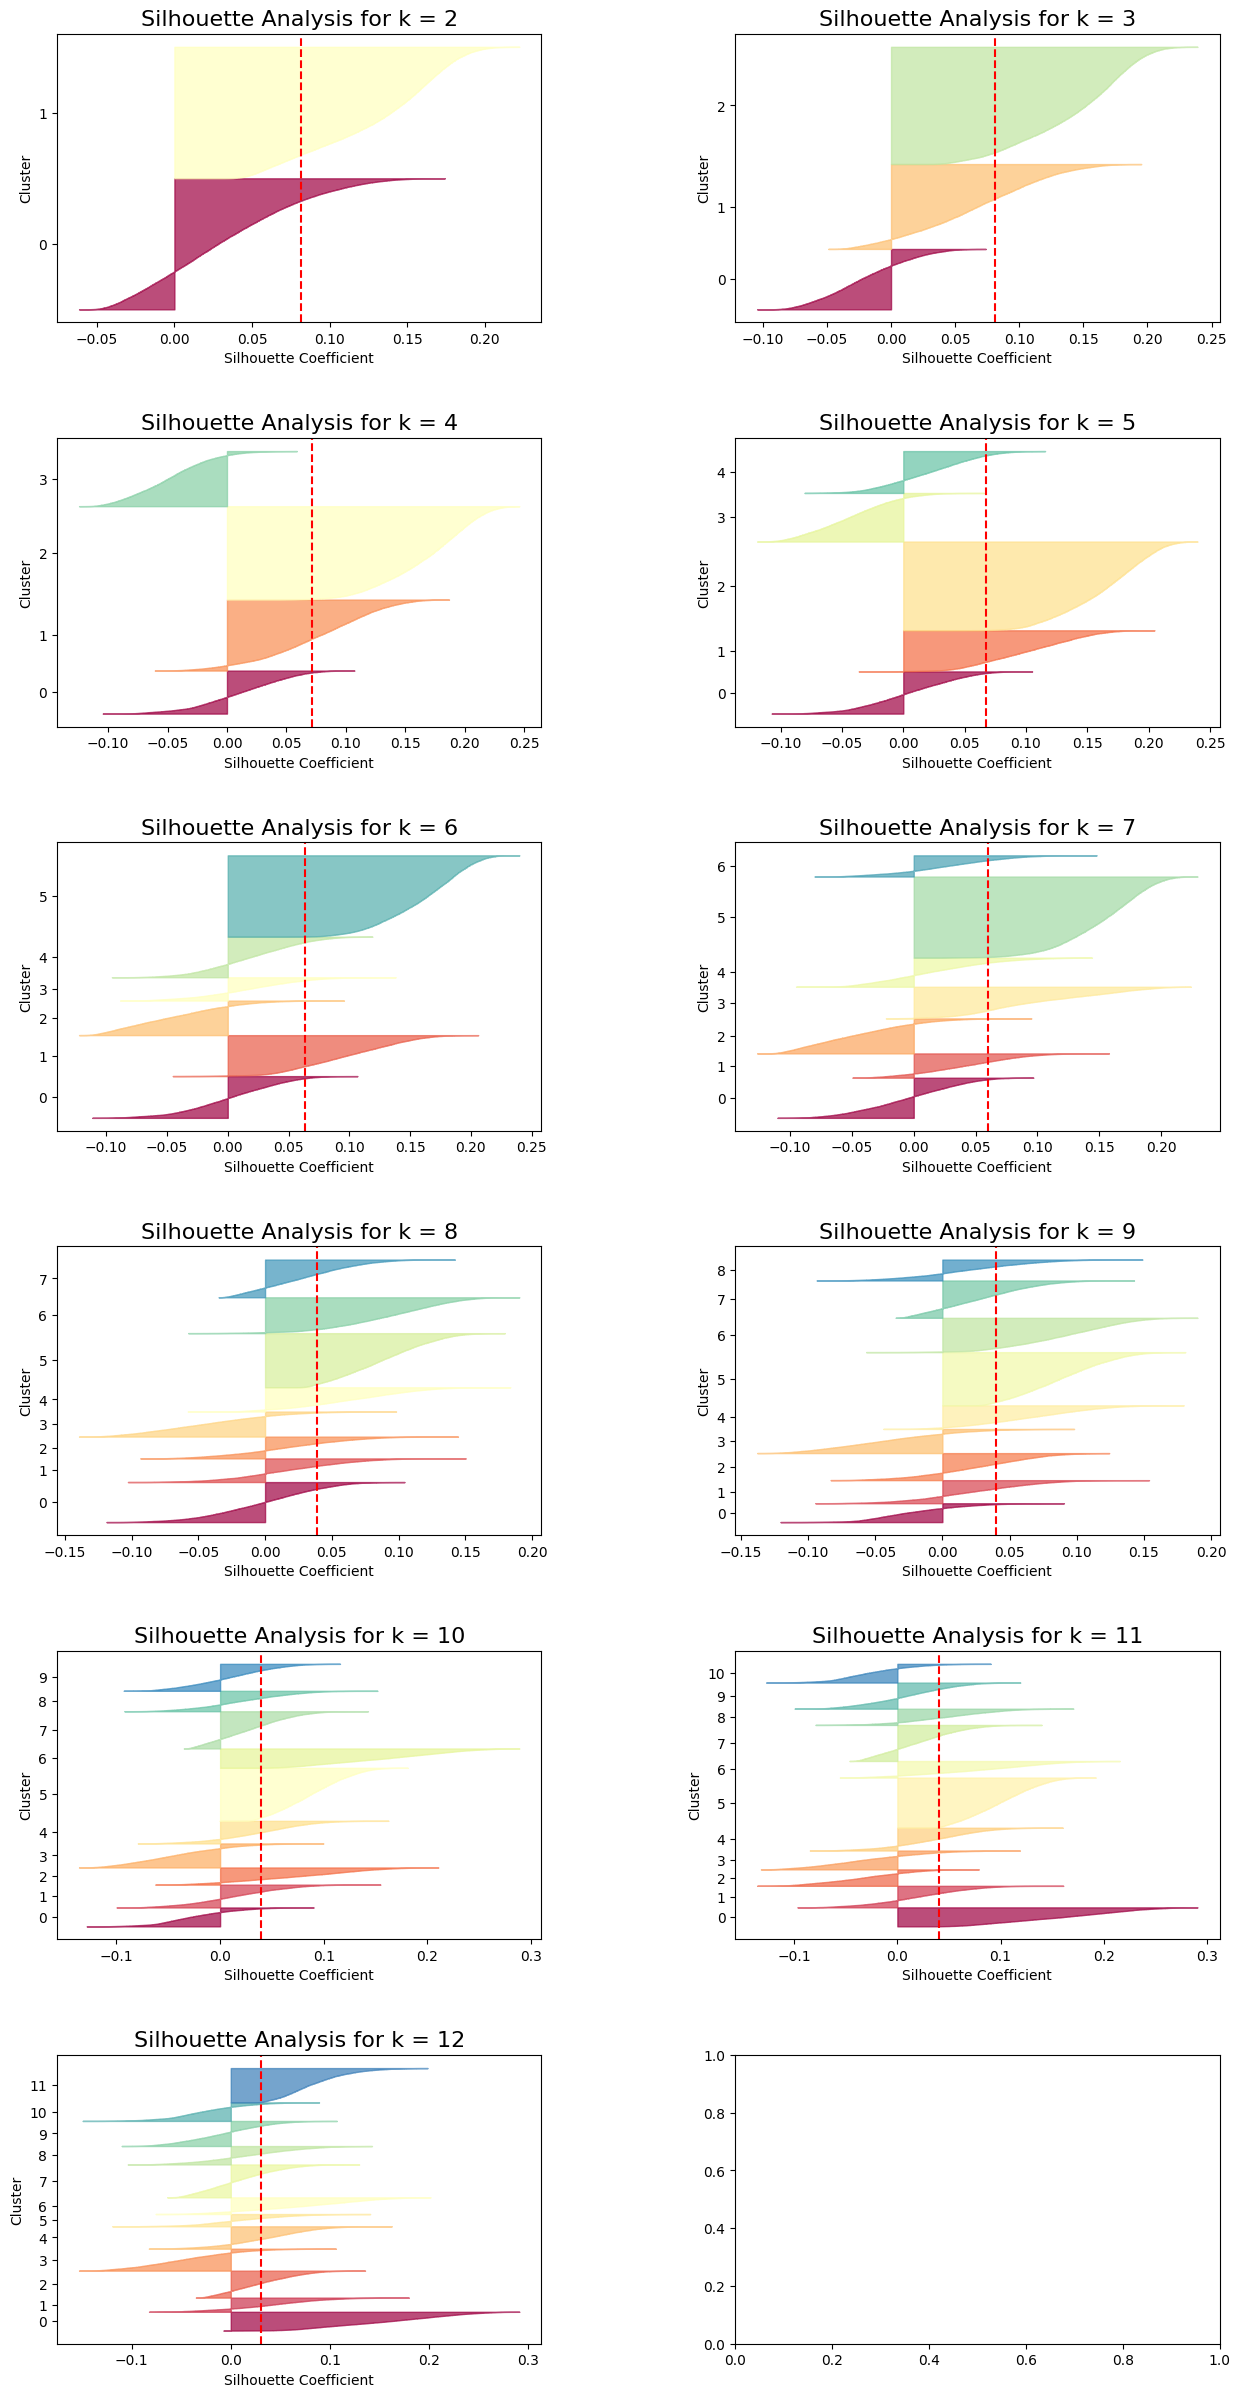

In [34]:
## Paso 7: Visualizar los Diagramas de Silueta
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette_diagrams(data, range_k):
    fig, axs = plt.subplots(6, 2, figsize=(15, 30))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, k in enumerate(range_k):
        ax = axs[i // 2, i % 2]
        kmeans = KMeans(n_clusters=k, random_state=42)
        y_pred = kmeans.fit_predict(data)
        silhouette_coefficients = silhouette_samples(data, y_pred)

        silhouette_avg = silhouette_score(data, y_pred)
        ticks = []
        y_lower = 10

        for j in range(k):
            jth_cluster_silhouette_values = silhouette_coefficients[y_pred == j]
            jth_cluster_silhouette_values.sort()

            size_cluster_j = jth_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_j

            color = plt.cm.Spectral(j / k)
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, jth_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append((y_lower + y_upper) / 2)
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax.set_yticks(ticks)
        ax.set_yticklabels(range(k))
        ax.set_ylabel('Cluster')
        ax.set_xlabel('Silhouette Coefficient')
        ax.set_title(f'Silhouette Analysis for k = {k}', fontsize=16)

    plt.show()

# Rango de clusters a analizar
range_clusters = range(2, 13)

# Llamar a la función para visualizar los diagramas de silueta
plot_silhouette_diagrams(images_flat, range_clusters)

## 2. Aprendizaje no supervisado. Aplicación del modelo mini-batch K-Means

### 2.1 Cargar el conjunto de datos chinesMnist


In [17]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd


mnist= pd.read_csv('train_data.csv')

In [18]:
print(mnist.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      8       0       0       0       0       0       0       0       0   
1      7       0       0       0       0       0       0       0       0   
2      0       0       0       0       0       0       0       0       0   
3      1       0       0       0       0       0       0       0       0   
4      4       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       122       255        90         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3      32  ...       255        64         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [19]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 359.3 MB


### 2.2 División del conjunto de datos X y las etiquetas mnist["label"] en conjuntos de entrenamiento y prueba.

In [20]:
from sklearn.model_selection import train_test_split

# la columna 'label' es la etiqueta
X = mnist.iloc[:, 1:] # Todas las columnas excepto la primera
y = mnist['label']  # Suponiendo que 'label' es la etiqueta

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
#Estandarizar
X_train_scaled = X_train.astype(np.float32) / 255
X_test_scaled = X_test.astype(np.float32) / 255

### 2.3 Función load_next_batch(batch_size)
Con ésta función se toma un tamaño del lote como entrada y se devuelve un lote aleatorio de datos de entrada del conjunto de datos X.\
Esto se hace para implementar el aprendizaje por lotes, se utilizará muestras de datos en lugar de todo el conjunto de datos a la vez.

In [22]:

def load_next_batch(batch_size):
    # Genera un array de índices aleatorios con base en la cantidad de filas en X
    random_indices = np.random.choice(len(X_train_scaled), batch_size, replace=False)
    # Usa .iloc para seleccionar las filas correspondientes a esos índices
    return X_train_scaled.iloc[random_indices]

### 2.4 Entrenamiento de un modelo de agrupamiento utilizando el algoritmo Mini-Batch K-Means

In [23]:
from sklearn.cluster import MiniBatchKMeans

k = 5                                 #Número de clústeres (grupos) en los que se desea dividir los datos.
n_init = 10                           #Número de veces que se ejecutará el algoritmo con diferentes centroides iniciales. Se elige el modelo con la inercia más baja.
n_iterations = 100                    #Número total de iteraciones para entrenar el modelo Mini-Batch K-Means.
batch_size = 100                      #Tamaño del lote (batch) de muestras que se utilizará en cada iteración del entrenamiento.
init_size = 500                       #Tamaño del conjunto de datos de inicialización -> para inicializar los centroides iniciales del algoritmo.
evaluate_on_last_n_iters = 10         #Número de últimas iteraciones en las que se evaluará la inercia para determinar el mejor modelo.

best_kmeans = None                    #Variable best_kmeans: Va almacenar el mejor modelo Mini-Batch K-Means encontrado durante el bucle de inicialización

for init in range(n_init):            #Bucle de inicialización: Itera n_init veces para entrenar el modelo con diferentes centroides iniciales.
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size, n_init=1)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

## 2.5 Modelo Mini-Batch K-Means encontrado para el entrenamiento
Se calcula la puntuación del mejor modelo Mini-Batch K-Means en relación con el conjunto de datos X. Ésto proporciona una medida de qué tan bien se ajustan los datos a los clústeres definidos por el modelo.\
La puntuación se calcula como la negativa de la inercia del modelo, que es una medida de la suma de las distancias cuadradas de las muestras a su centroide más cercano.\
Se prefiere una puntuación más alta que va indicar que el modelo tiene una inercia menor y que se ha agrupado mejor los datos.

In [24]:
# Evaluar el modelo
score = best_kmeans.score(X_train_scaled)
print(f"Score: {score}")

Score: -3286435.0


Observación: El algoritmo de 'mini-batch K-Means' es más rápido que 'K-Means' normal, pero su precisión no es mejor.

### 2.6 Encontrar el número óptimo de grupos aplicando la métrica silhouette score.
La métrica silhouette score se basa en el cálculo del coeficiente de silueta (silhouette coefficient) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos.\
El coeficiente de silueta varía entre -1 y 1. Un coeficiente de silueta cercano a 1 indica que la muestra está bien clasificada en su propio clúster y lejos de los clústeres vecinos. Un coeficiente de silueta cercano a -1 indica que la muestra puede estar mal clasificada en su propio clúster y cerca de los clústeres vecinos. Un coeficiente de silueta cercano a 0 indica que la muestra está cerca del límite de decisión entre dos clústeres.

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=6, random_state=42)

In [34]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_scaled, kmeans.labels_)

0.05773004

#### Observación:
El coeficiente de silueta obtenido de 0.813042 nos indica que las muestras están bien agrupadas en sus respectivos clústeres y que hay una buena separación entre los clústeres. También nos indica que el modelo de Mini-Batch K-Means ha generado clústeres de alta calidad para nuestro conjunto de datos.


## Calcular la métrica para diferentes números de clusters 'k'
Se va a determinar la calidad de los clusters generados por KMeans para diferentes valores de 'k' (1 a 10)  utilizando el coeficiente de silueta como métrica de evaluacion.\
Objetivo: Encontrar el valor óptimo de 'k'.

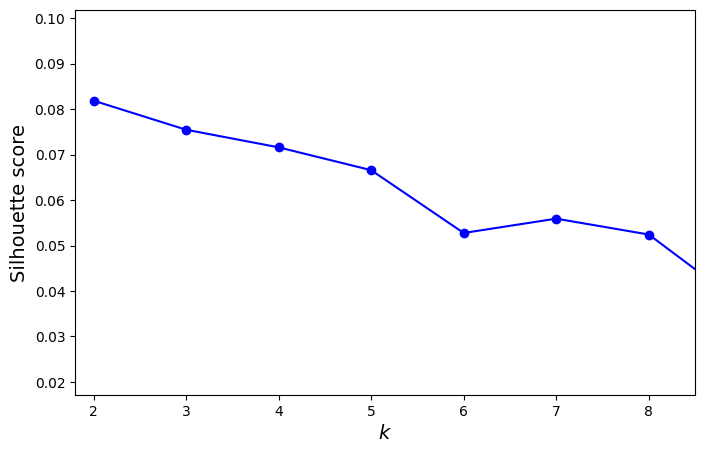

In [35]:
import matplotlib.pyplot as plt
kmeans_per_k = [KMeans(n_clusters=k, n_init = 10, random_state=42).fit(X_train_scaled)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X_train_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.axis([1.8, 8.5, min(silhouette_scores) - 0.02, max(silhouette_scores) + 0.02])  # Ajustamos el tamaño del eje y
plt.show()

#### Observación:
Se puede verificar que para k=5, el coeficiente de silueta es más cercano a 1. Con k=5 las muestras están mejor agrupadas.

### 2.7 Diagramas de silueta para diferentes valores de 'k'
En los diagramas se puede visualizar todos los coeficientes de silueta ordenados por grupos y su valor.

<Figure size 1500x1800 with 0 Axes>

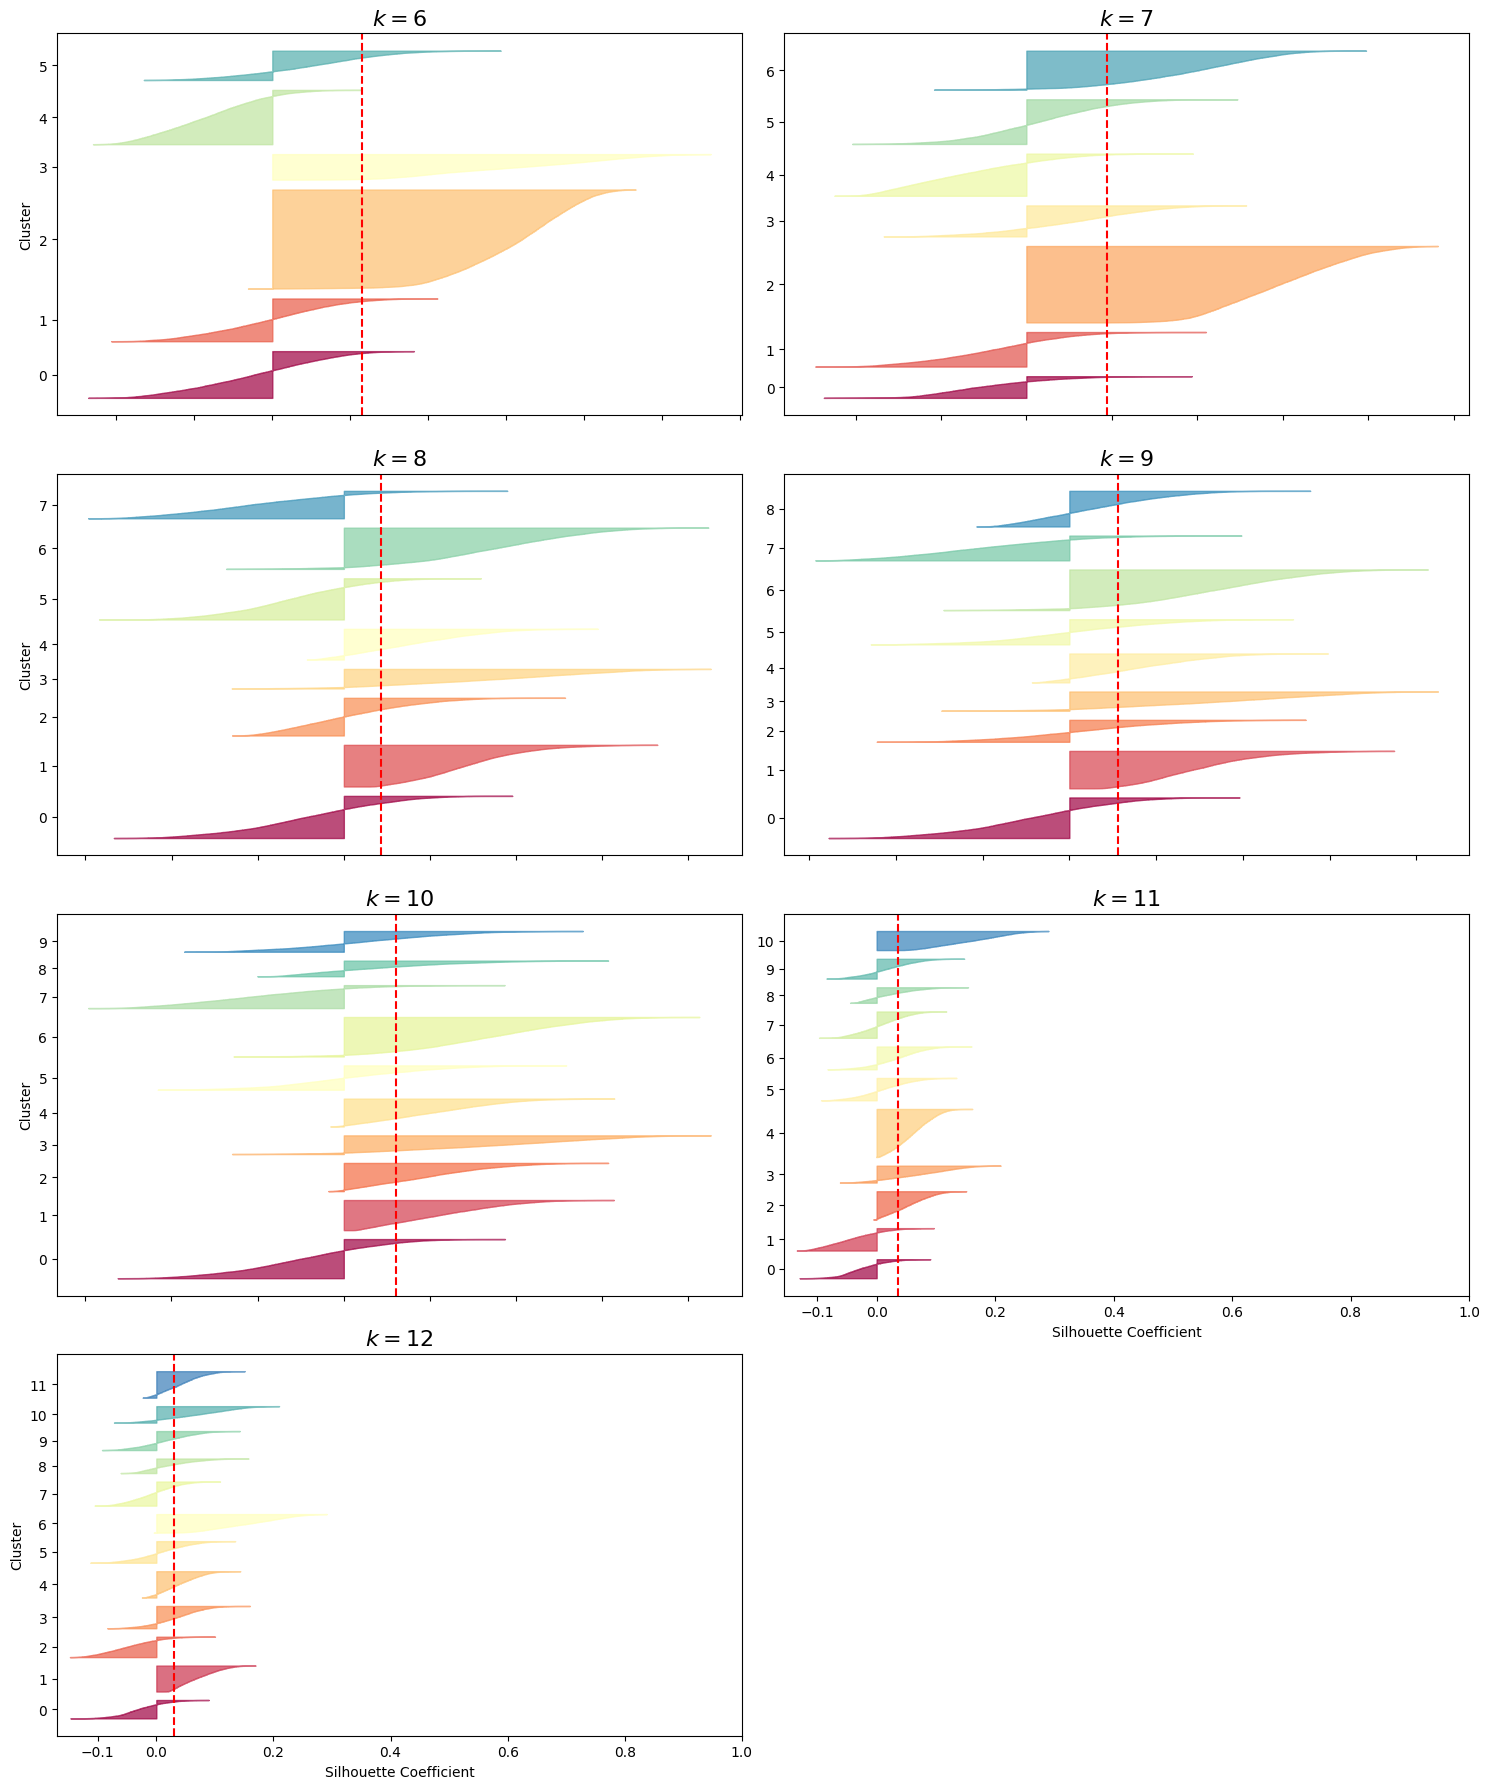

In [39]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(15, 18))

# Aquí reentrenamos los modelos KMeans para k desde 6 hasta 12
kmeans_per_k = []
silhouette_scores = []

for k in range(6, 13):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)  # Usa tus datos escalados
    
    # Verificar que el número de clústeres es válido
    if len(np.unique(kmeans.labels_)) > 1:
        kmeans_per_k.append(kmeans)
        silhouette_score_value = silhouette_score(X_train_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_score_value)
    else:
        print(f"El modelo con k={k} asignó todas las muestras a un solo clúster.")

# Generar los gráficos solo para los valores de k válidos
plt.figure(figsize=(15, 18))

# Ajustar el rango del bucle para incluir k desde 6 hasta 12
for k in range(6, 13):
    # Solo generar gráficos para k que tienen modelos válidos
    if k - 6 < len(kmeans_per_k):
        plt.subplot(4, 2, k - 5)  # Ajustar el diseño de los subplots

        y_pred = kmeans_per_k[k - 6].labels_  # Ajustar el índice
        silhouette_coefficients = silhouette_samples(X_train_scaled, y_pred)

        padding = len(X_train_scaled) // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = mpl.cm.Spectral(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (6, 8, 10, 12):
            plt.ylabel("Cluster")

        if k in (11, 12):
            plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
        else:
            plt.tick_params(labelbottom=False)

        plt.axvline(x=silhouette_scores[k - 6], color="red", linestyle="--")
        plt.title("$k={}$".format(k), fontsize=16)

plt.tight_layout()
plt.show()

### 3. K-Means para aprendizaje semi-supervisado.

Permite entrenar modelos con datasets parcialmente etiquetados.\
Para el entrenamiento se utilizará el mismo dataset de la Sección 2, Fashion_MNIST.



In [73]:

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Cargar el dataset
mnist = pd.read_csv('train_data.csv')


# la columna 'label' es la etiqueta
X = mnist.iloc[:, 1:] # Todas las columnas excepto la primera
y = mnist['label']  # Suponiendo que 'label' es la etiqueta

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3.1. Entrenamiento del modelo KMeans para k = 50 grupos

Mediante K-Means se encuentra clústeres en los datos de entrenamiento sin etiquetas. Estos clústeres se utilizarán como representaciones de las clases.\
kmeans.fit_transform(X_train): Entrena el modelo K-Means con los datos (X_train) y transforma los datos en distancias a los centroides de los clústeres encontrados. Los resultados se almacenan en X_digits_dist.

In [75]:
print(X_train.shape)  

(45000, 784)


In [76]:
from sklearn.cluster import KMeans

k = 50
kmeans = KMeans(n_clusters=k, random_state=42)        #Crea objeto KMeans con 50 clústeres y una semilla aleatoria
X_digits_dist = kmeans.fit_transform(X_train)

### Selección de las instancias de datos más representativas de cada clúster
Función np.argmin(X_digits_dist, axis=0): Encuentra el índice del valor mínimo a lo largo del eje especificado (en este caso, el eje 0). Para cada instancia de datos, devuelve el índice del clúster más cercano (es decir, el índice del valor mínimo en X_digits_dist para cada columna).

In [77]:
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train.values[idxs]

#### Visualización de las imágenes representativas de cada clúster

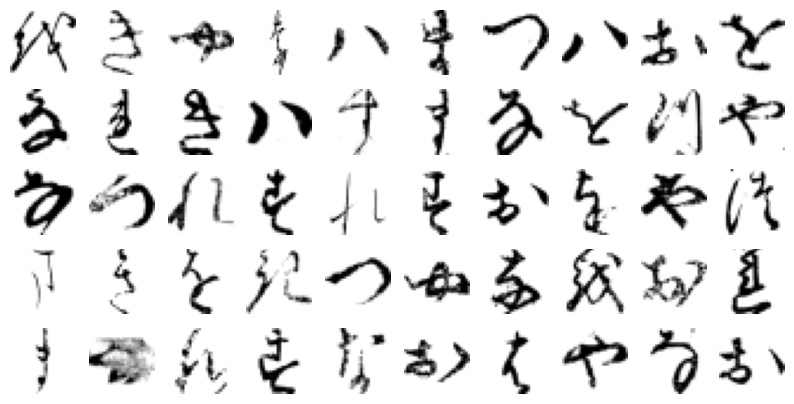

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(5, 10, index+1)
  plt.imshow(X_representative_digit.reshape(28,28), cmap="binary")
  plt.axis('off')
plt.show()

#### Obtención de las etiquetas de las imágenes representativas de cada clúster
Se anotará manualmente estas etiquetas ya que disponemos de dichas etiquetas.

In [79]:
y_representative_digits = y_train.values[idxs]

### Entrenamiento del Clasificador utilizando las imágenes representativas de los clústeres como datos de entrenamiento
Luego del entrenamiento se evalúa su rendimiento en el conjunto de prueba.

In [80]:
from sklearn.linear_model import LogisticRegression                             #LogisticRegression: Clasificador lineal para clasificación binaria y multiclase.


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)     #Creación del clasificador
                                                                                #multi_class="ovr": Se utiliza la estrategia "one-vs-rest" para problemas de clasificación multiclase.
                                                                                #solver="lbfgs": Algoritmo a utilizar en la optimización. "Limited-memory Broyden–Fletcher–Goldfarb–Shanno".

%time log_reg2.fit(X_representative_digits, y_representative_digits)            #Entrenamiento del clasificador utilizando las imágenes representativas y sus etiquetas
log_reg2.score(X_test, y_test)                                                  #Evaluación del rendimiento del clasificador


CPU times: total: 15.6 ms
Wall time: 114 ms


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.6219333333333333

Observación: Se ha obtenido una precisión de  12.50%  habiendo anotado solo 50 imágenes, pero las más representativas.

### Entrenamiento del modelo con 50 imágenes aleatorias

In [81]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:50], y_train[:50])
log_reg.score(X_test, y_test)

CPU times: total: 31.2 ms
Wall time: 120 ms


0.5036666666666667

### Asignar automáticamente las etiquetas de las muestras representativas a todas las muestras que pertenecen al mismo grupo (clúster) en el conjunto de entrenamiento
Como tenemos un clasificador, se puede usar para anotar de manera automática el resto de imágenes. Esto se hace para propagar las etiquetas y utilizarlas en el entrenamiento de un modelo supervisado que puede ser útil en enfoques semi-supervisados.

In [82]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

### Entrenamiento de un modelo de regresión logística utilizando las etiquetas propagadas y_train_propagated en lugar de las etiquetas originales y_train
El entrenamiento se realiza utilizando las primeras 4000 imágenes del conjunto de entrenamiento (X_train[:4000]) y las etiquetas propagadas correspondientes (y_train_propagated[:4000]).

In [83]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

CPU times: total: 172 ms
Wall time: 325 ms


0.6549333333333334

#### Observación:
Para el conjunto de prueba, se obtiene una precisión de 17.14% lo que significa que nuestro clasificador no ha mejorado. Ésto se debe a que no todas las imágenes están bien agrupadas.\
Se podría mejorar asignando etiquetas a las muestras más cercanas a la imagen más representativa de cada grupo o con técnicas de aprendizaje activo (siguiente sección).

## 4. Aprendizaje Activo (active Learning)

Se va a entrenar el modelo de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset identificando ejemplos en las que el modelo tiene más dificultades.

In [84]:
probas = log_reg3.predict_proba(X_train[:4000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]

array([0.25010834, 0.26372453, 0.29490941, 0.31135144, 0.31480358,
       0.32474025, 0.33128407, 0.33150572, 0.33221218, 0.33333618])

#### Observación:
Los resultados muestran probabilidades cercanas a 1, indica que el modelo tiene una alta confianza en sus predicciones para esas muestras específicas. Por tanto, éstas muestras no se seleccionarán para ser etiquetadas manualmente y ser agregadas al conjunto de entrenamiento.

### Visualizar los ejemplos que tienen las probabilidades más bajas de ser clasificadas correctamente por el modelo de regresión logística
Con X_lowest = X_train.values[:10000][sorted_ixs[:k]] se selecciona los primeros 1000 ejemplos del conjunto de datos  X_train y se reordena según los índices de las probabilidades, ordenadas de menor a mayor.\
La variable k define cuantas muestras con las probabilidades más bajas se van a seleccionar.

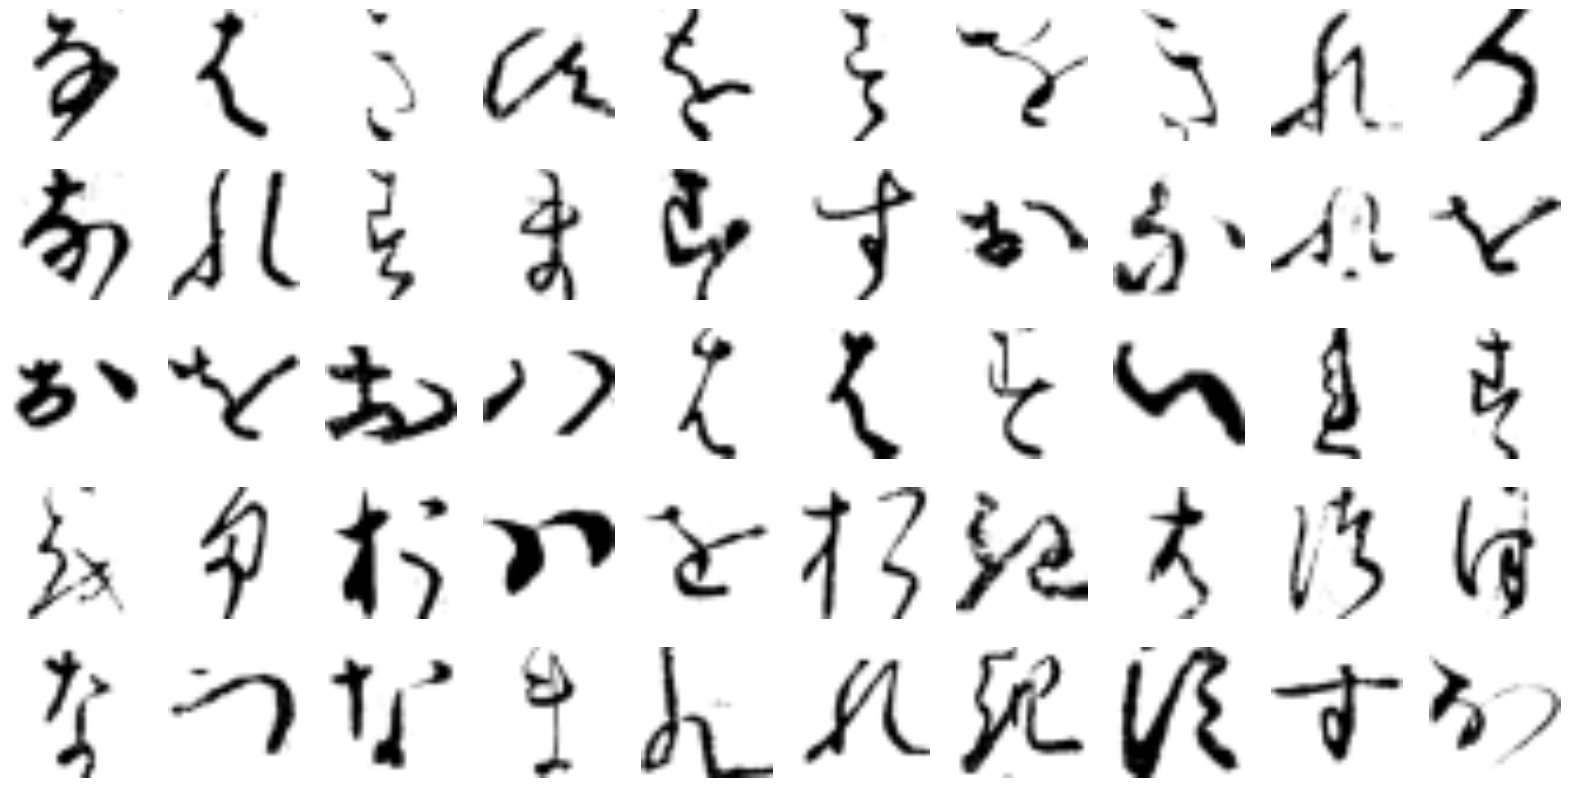

In [85]:
X_lowest = X_train.values[:4000][sorted_ixs[:k]]
# Definir k correctamente (número de imágenes a mostrar)
k = len(X_lowest)

# Calcular el número de filas y columnas
ncols = 10
nrows = k // ncols + (1 if k % ncols != 0 else 0)

# Crear la figura
plt.figure(figsize=(ncols * 2, nrows * 2))

# Crear subplots para cada imagen en X_lowest
for index, img in enumerate(X_lowest):
    plt.subplot(nrows, ncols, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')

# Mostrar la figura
plt.show()

## Selección de las etiquetas que corresponden a los primeros 1000 ejemplos del conjunto de datos (y_train)
 Similar a X_lowest. Se reordena según los índices de las probabilidades, de menor a mayor. 'k' define cuántas de las etiquetas de los ejemplos con las probabilidades más bajas se van a seleccionar.

In [86]:
y_lowest = y_train.values[:4000][sorted_ixs[:k]]
y_lowest

array([4, 5, 1, 2, 9, 2, 9, 1, 8, 3, 4, 8, 2, 6, 2, 2, 0, 4, 8, 9, 0, 9,
       0, 5, 5, 5, 2, 5, 8, 2, 9, 6, 0, 5, 9, 0, 1, 5, 3, 3, 4, 3, 4, 6,
       8, 8, 1, 2, 2, 0], dtype=int64)

## Propagación de etiquetas
Mediante el proceso de propagación de etiquetas, se actualiza el conjunto de etiquetas de entrenamiento con las etiquetas reales de las muestras seleccionadas que el modelo encuentra más difíciles de clasificar correctamente. Esto se hace para mejorar la calidad del conjunto de datos de entrenamiento y el rendimiento del modelo.

In [87]:
y_train2 = y_train_propagated[:4000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

## Entrenamiento con el modelo de regresión logística utilizando las etiquetas actualizadas y_train2

In [88]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)
%time log_reg5.fit(X_train[:4000], y_train2)
log_reg5.score(X_test, y_test)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: total: 31.5 s
Wall time: 24 s


0.6384